# PilatusXPP

This is an example ipython notebook showing the functionality of the `pyEvalData` module.

The _spec_ data and _Pilatus_ images are first read from disk and then saved to the _hdf5_ file.
For all subsequent runs the data will be directly read from the _hdf5_ file.


## Imports

In [1]:
#numpy
from numpy import *
# plotting matplotlib
import matplotlib as mpl
from matplotlib.pyplot import *
# fitting lmfit
from lmfit import Parameters, Model
# pyEvalModule 
import evalData

import xrayutilities as xu

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Setting

In [2]:
# configure to autoload all extension
%load_ext autoreload
%autoreload 2

# just plotting defaults
# use '%matplotlib notebook' for interactive graphs
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['figure.max_open_warning'] = 100
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size']=14
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.weight']='normal'
mpl.rcParams['axes.titlesize']=16
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['ytick.labelsize']=10
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['figure.facecolor']='w'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.fontsize'] = 10

%config InlineBackend.figure_format = "png"

## pyEvalData Setup

In [3]:
# load sepc file
edp = evalData.pilatusXPP('examplePilatus', './', '.spec')

XU.io.SPECFile.Update: reparsing file for new scans ...
XU.io.SPECScan.ReadData: scan_1: 41 32 32
XU.io.SPECScan.ReadData: scan_2: 41 32 32
XU.io.SPECScan.ReadData: scan_3: 41 32 32
XU.io.SPECScan.ReadData: scan_4: 41 32 32
XU.io.SPECScan.ReadData: scan_5: 41 32 32
XU.io.SPECScan.ReadData: scan_6: 41 32 32
XU.io.SPECScan.ReadData: scan_7: 41 32 32
XU.io.SPECScan.ReadData: scan_8: 41 32 32
XU.io.SPECScan.ReadData: scan_9: 41 32 32
XU.io.SPECScan.ReadData: scan_10: 41 32 32
XU.io.SPECScan.ReadData: scan_11: 41 32 32
XU.io.SPECScan.ReadData: scan_12: 41 32 32
XU.io.SPECScan.ReadData: scan_13: 41 32 32
XU.io.SPECScan.ReadData: scan_14: 41 32 32
XU.io.SPECScan.ReadData: scan_15: 41 32 32
XU.io.SPECScan.ReadData: scan_16: 41 32 32
XU.io.SPECScan.ReadData: scan_17: 41 32 32
XU.io.SPECScan.ReadData: scan_18: 41 32 32
XU.io.SPECScan.ReadData: scan_19: 41 32 32
XU.io.SPECScan.ReadData: scan_20: 41 32 32
XU.io.SPECScan.ReadData: scan_21: 41 32 32
XU.io.SPECScan.ReadData: scan_22: 41 32 32
XU.io.S

## Setup the xrayutilities for q-conversion

See `xrayutilities` documentation for details.

Scan #1 read from .tiff and saved to HDF5.


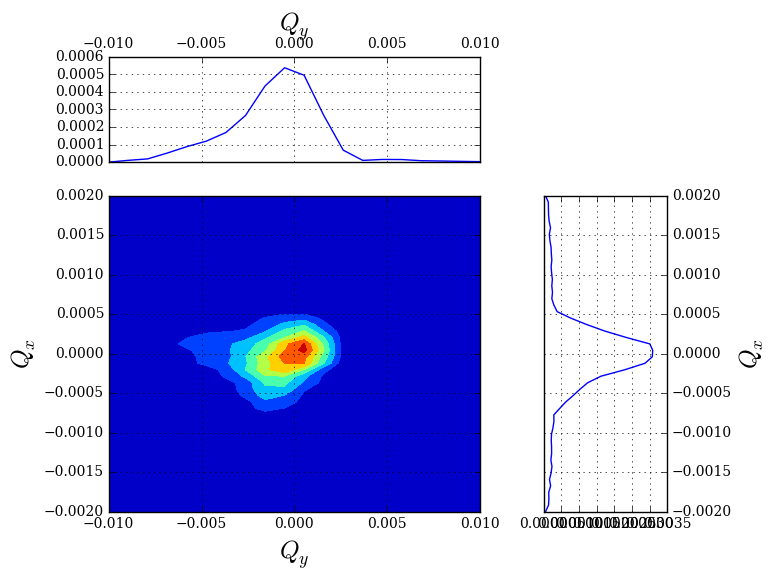

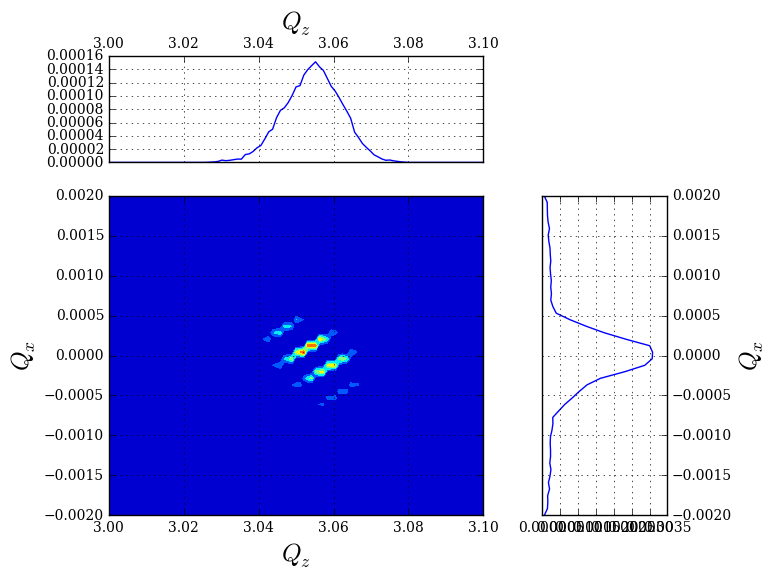

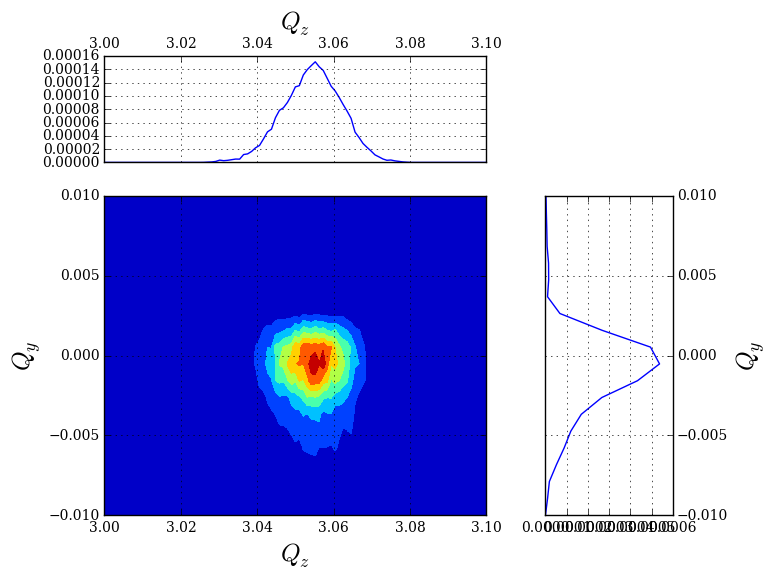

In [4]:
edp.pilatus = evalData.Pilatus100k() # load the Pilatus100k class for image reading

en = 9000 # [eV] x-ray energy
# experimental geometry
qconv = xu.experiment.QConversion(['y-', 'x+', 'z+'], ['y-'],
                                      [1, 0, 0], en = en)

# define experimental class for angle conversion
hxrd = xu.HXRD([1, 0, 0], [0, 0, 1], qconv=qconv, en=en)
# initialize area detector properties
hxrd.Ang2Q.init_area('y+', 'z-',
                      cch1=74, cch2=225.8,
                      Nch1=edp.pilatus.nop1, Nch2=edp.pilatus.nop2, distance=705, pwidth1 = 0.172, pwidth2 = 0.172,
                      Nav=[1,1],
                      roi=[0, edp.pilatus.nop1, 0, edp.pilatus.nop2])

# hand the hxrd to the PilatusXPP class
edp.hxrd = hxrd
# initilazie the gridder
gridder = xu.Gridder3D(50, 20, 97)
gridder.dataRange(-.002, .002, -.01, .01, 3., 3.1)
# hand the gridder to the PilatusXPP calss
edp.gridder = gridder

edp.plotLog = False
#  plot a Pilatus scan using the spec scan number
edp.plotPilatusScanQ(1)

## Fit a scan sequence

This is similar to the parent `spec` class.
There are only additional counter available which are defined in the `addCustomCounters` method of the `pilatusXPP` class:

`[qx, qy, qz, QxMap, QyMap, QzMap]`

Scan #1 read from HDF5.
Scan #2 read from .tiff and saved to HDF5.
Scan #3 read from .tiff and saved to HDF5.
Scan #4 read from .tiff and saved to HDF5.
Scan #5 read from .tiff and saved to HDF5.
Scan #6 read from .tiff and saved to HDF5.
Scan #7 read from .tiff and saved to HDF5.
Scan #8 read from .tiff and saved to HDF5.
Scan #9 read from .tiff and saved to HDF5.
Scan #10 read from .tiff and saved to HDF5.
Scan #11 read from .tiff and saved to HDF5.
Scan #12 read from .tiff and saved to HDF5.
Scan #13 read from .tiff and saved to HDF5.
Scan #14 read from .tiff and saved to HDF5.
Scan #15 read from .tiff and saved to HDF5.
Scan #16 read from .tiff and saved to HDF5.
Scan #17 read from .tiff and saved to HDF5.
Scan #18 read from .tiff and saved to HDF5.
Scan #19 read from .tiff and saved to HDF5.
Scan #20 read from .tiff and saved to HDF5.
Scan #21 read from .tiff and saved to HDF5.
Scan #22 read from .tiff and saved to HDF5.
Scan #23 read from .tiff and saved to HDF5.
Scan #24 read fr

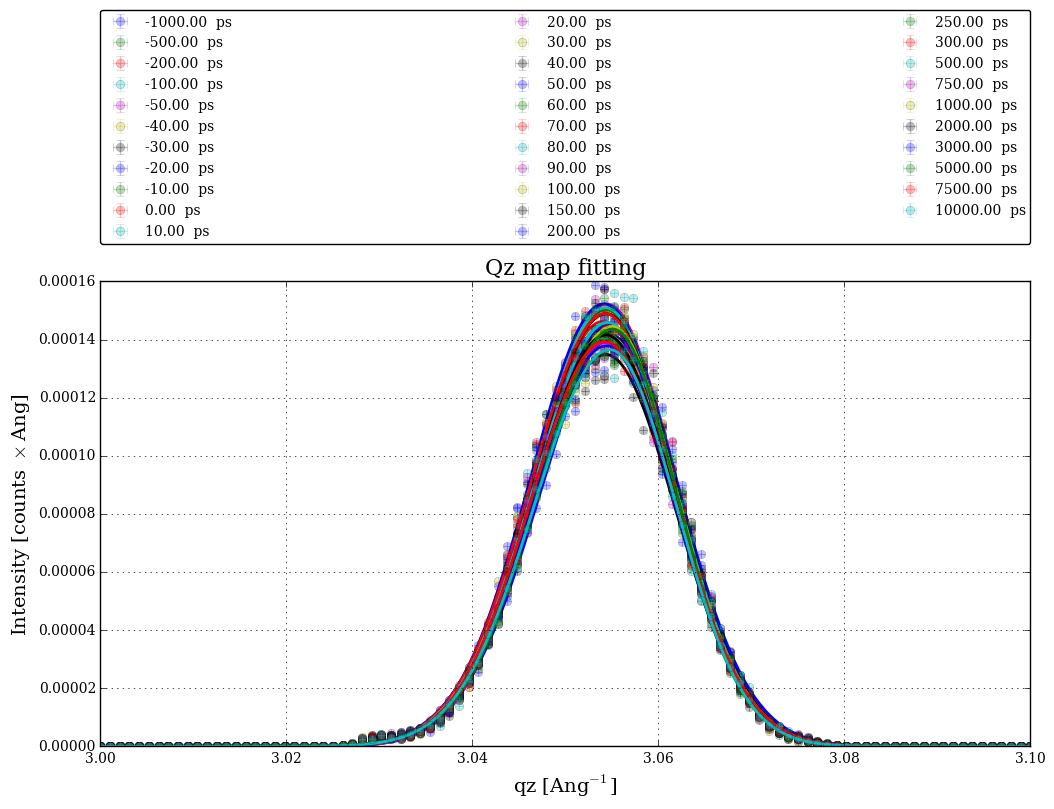

In [5]:
scanSequence = array([
                    [[1], -1000],
                    [[2], -500],
                    [[3], -200],
                    [[4], -100],
                    [[5], -50],
                    [[6], -40],
                    [[7], -30],
                    [[8], -20],
                    [[9], -10],
                    [[10], 0],
                    [[11], 10],
                    [[12], 20],
                    [[13], 30],
                    [[14], 40],
                    [[15], 50],
                    [[16], 60],
                    [[17], 70],
                    [[18], 80],
                    [[19], 90],
                    [[20], 100],
                    [[21], 150],
                    [[22], 200],
                    [[23], 250],
                    [[24], 300],
                    [[25], 500],
                    [[26], 750],
                    [[27], 1000],
                    [[28], 2000],
                    [[29], 3000],
                    [[30], 5000],
                    [[31], 7500],
                    [[32], 10000] 
               ])

# define the fit model
pseudoVoightAsym = xu.math.functions.PseudoVoigt1dasym

def myPseudoVoightAsym(x, center, fwhmLeft, fwhmRight, ampl, c, alpha):
    
    return pseudoVoightAsym(x, center, fwhmLeft, fwhmRight, ampl, c, alpha)

mod = Model(myPseudoVoightAsym)

# define the fit parameters
parsP = Parameters()
parsP.add('center', value=3.05, vary=True)
parsP.add('fwhmLeft', value=0.01, min = 0, vary=True)
parsP.add('fwhmRight', value=0.01, min = 0, vary=True)
parsP.add('ampl', value=0.0004, min = 0, vary=True)
parsP.add('c', value=0, min = 0, vary=True)
parsP.add('alpha', value=0.5, min=0, max=1, vary=True)

# plot the data and fits
figure(figsize=[12,6])
edp.xCol = 'qz'
edp.cList = ['QzMap']
results, parameters, data = edp.fitScanSequence(scanSequence, mod, parsP, sequenceType='delay', 
                                                    fitReport=0, yErr = 'err', showSingle=False, 
                                                    weights=False, xText = r'qz [Ang$^{-1}$]', 
                                                    yText = r'Intensity [counts $\times$ Ang]', 
                                                    titleText = 'Qz map fitting', plotSeparate=False, xlims=[3,3.1])
show()

## Plot the fit results

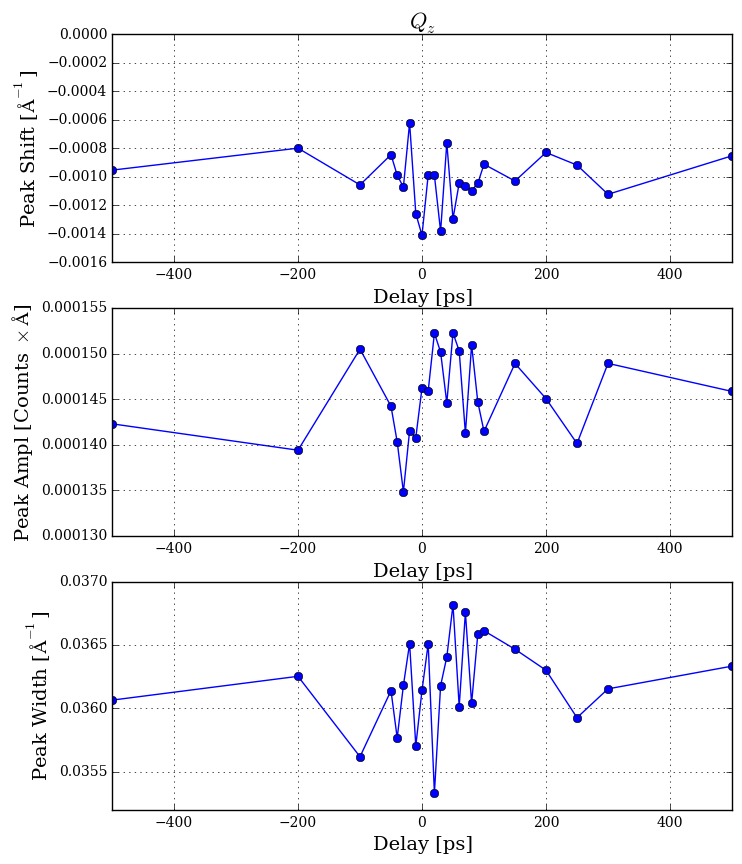

In [6]:
xlims = [-500, 500]
figure(figsize=[8,10])
subplot(3,1,1)
plot(parameters, results['QzMap']['center']-results['QzMap']['center'][0], '-o')
xlim(xlims)
xlabel('Delay [ps]')
ylabel(r'Peak Shift [$\AA^{-1}$]')
grid(True)
title(r'$Q_z$')

subplot(3,1,2)
plot(parameters, results['QzMap']['ampl'], '-o')
xlim(xlims)
xlabel('Delay [ps]')
ylabel(r'Peak Ampl [Counts $\times \ \AA$]')
grid(True)

subplot(3,1,3)
plot(parameters, results['QzMap']['fwhmLeft']+results['QzMap']['fwhmRight'], '-o')
xlim(xlims)
xlabel('Delay [ps]')
ylabel(r'Peak Width [$\AA^{-1}$]')
grid(True)
show()